Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Set style for plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

Load & Explore Data

In [3]:
# Load the dataset
df = pd.read_csv('Datasets/Salary_data.csv')

In [4]:
# Initial exploration
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

Dataset shape: (6704, 7)

First 5 rows:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Job Title Category
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,Engineering & Development
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,Data & Analytics
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Management & Leadership
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,Sales & Marketing
4,52.0,Male,Master's,Director,20.0,200000.0,Management & Leadership


In [5]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Job Title Category     0
dtype: int64


In [6]:

# Check data types
print("\nData types:")
print(df.dtypes)


Data types:
Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
Job Title Category      object
dtype: object


In [7]:

# Statistically Description
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


Data Cleaning

Find Outliner

In [8]:
# Calculate IQR (Interquartile Range) for Salary
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")

# Identify outliers
outliers = df[(df['Salary'] < lower_bound) | (df['Salary'] > upper_bound)]
print(f"\nNumber of outliers detected: {len(outliers)}")

# Display outliers
print("\nOutlier records:")
display(outliers[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']])

Q1 (25th percentile): 70000.00
Q3 (75th percentile): 160000.00
IQR: 90000.00
Lower Bound: -65000.00
Upper Bound: 295000.00

Number of outliers detected: 0

Outlier records:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary


Visualizing the Outliers

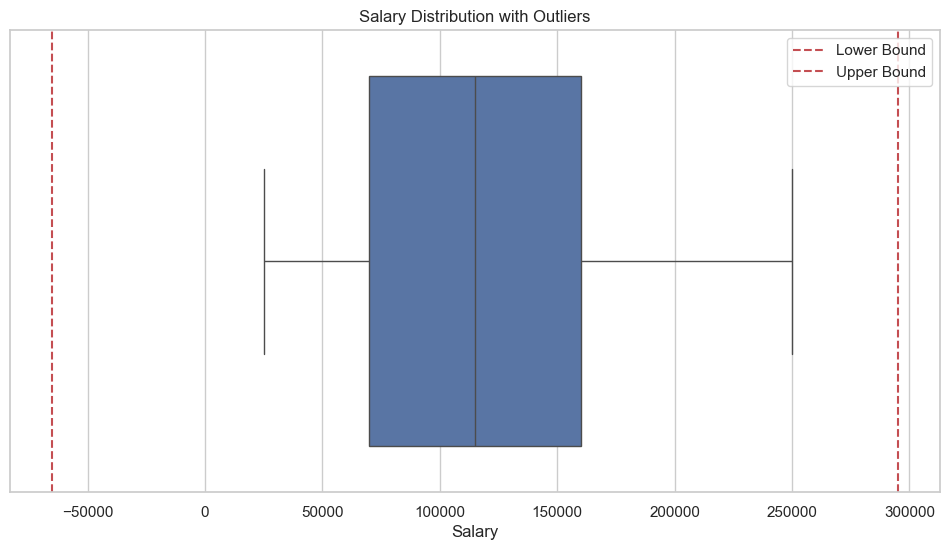

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Salary'])
plt.title('Salary Distribution with Outliers')
plt.axvline(x=lower_bound, color='r', linestyle='--', label='Lower Bound')
plt.axvline(x=upper_bound, color='r', linestyle='--', label='Upper Bound')
plt.legend()
plt.show()

In [9]:
# Convert categorical variables to proper data types
df['Gender'] = df['Gender'].astype('category')
df['Education Level'] = df['Education Level'].astype('category')
df['Job Title Category'] = df['Job Title Category'].astype('category')

# Handle any salary outliers (example: remove salaries below 10,000 or above 500,000)
df = df[(df['Salary'] > 10000) & (df['Salary'] < 500000)]

# Create experience bins if needed
df['Experience Bins'] = pd.cut(df['Years of Experience'], 
                              bins=[0, 5, 10, 15, 20, 25, 30],
                              labels=['0-5', '5-10', '10-15', '15-20', '20-25', '25+'])